In your pairs, work on the following exercise:
The data comes from a longitudinal study of lung tomography measurements of different groups of patients.

Download at https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv
    
For each group, is there a significant difference between time 1 and time 2?
Is there a significant difference in the mean of all groups at time 2?

In [8]:
!pip install statsmodels

<IPython.core.display.Javascript object>

In [9]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
group = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv"
)
group.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


In [4]:
group.describe()

,group,t1,t2
count,400.000000,400.000000,400.000000
mean,1.750000,4235.997500,4229.355000
std,0.830195,1199.452175,1185.222621
min,1.000000,1178.000000,1241.000000
25%,1.000000,3448.250000,3396.750000
50%,1.500000,4180.000000,4244.500000
75%,2.250000,5061.500000,5078.500000
max,3.000000,7646.000000,7430.000000


In [5]:
group.shape

(400, 4)

In [6]:
group.isna().sum()

group      0
patient    0
t1         0
t2         0
dtype: int64

In [44]:
group.dtypes

group       int64
patient    object
t1          int64
t2          int64
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
pd.melt(group)

,variable,value
0,group,1
1,group,1
2,group,1
3,group,1
4,group,1
...,...,...
1595,t2,2717
1596,t2,2613
1597,t2,3064
1598,t2,3008


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

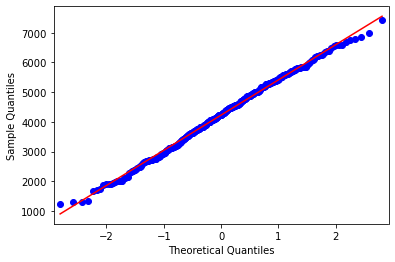

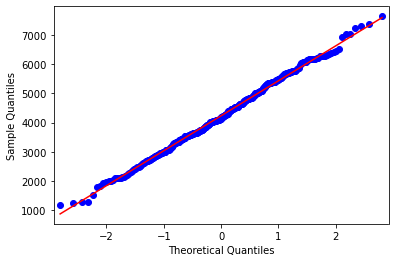

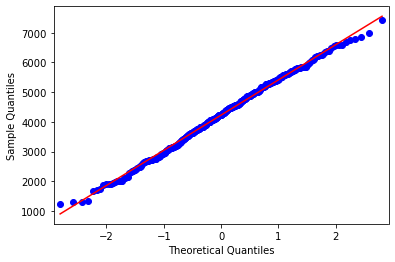

In [8]:
sm.qqplot(group['t1'], line='s')
sm.qqplot(group['t2'], line='s')

In [ ]:
they look normal to me on Quantiles graph. 

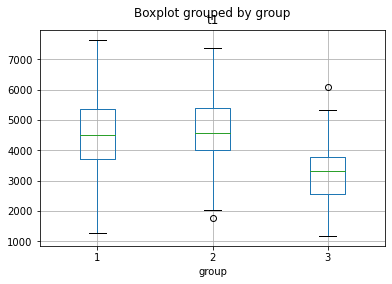

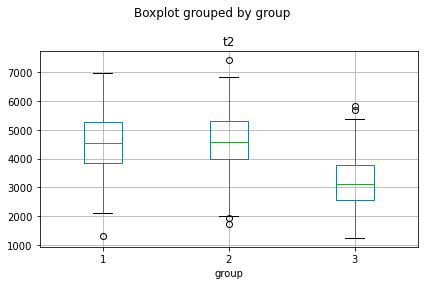

In [14]:
group.boxplot('t1', by='group')
group.boxplot('t2', by='group')
plt.tight_layout()
plt.show()

In [ ]:
#there's a difference, but not that much

In [15]:
#tall_group = pd.melt(group, var_name="patient", value_name="time")
#tall_group.head()
# not sure if i did this right

In [18]:
groups = group.groupby('group')['t2'].mean()
groups.head()

group
1    4539.895
2    4639.600
3    3198.030
Name: t2, dtype: float64

In [20]:
group = group[['group', 't2']]
g1 = group[group['group'] == 1]
g2 = group[group['group'] == 2]
g3 = group[group['group'] == 3]

In [21]:
f, p = stats.f_oneway(g1, g2, g3)
p[1]

c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


5.1893599904179e-26

In [ ]:
#there's no signifant difference. 